In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

import keras
from keras.preprocessing import image

C:\Users\DTY\Anaconda3\envs\PythonData\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
bee_data = pd.read_csv(os.path.join('..', 'PollenDataset','pollen_data.csv'))
bee_data.head()

,Unnamed: 0,filename,pollen_carrying
0,0,P10057-125r.jpg,1
1,1,P57380-120r.jpg,1
2,2,NP63671-221r.jpg,0
3,3,NP53776-47r.jpg,0
4,4,NP13382-201r.jpg,0


In [4]:
def x_and_y(bee_data):
    img_list = []
    pollen_list = []
    data = []
    for image_file, pollen_info in zip(bee_data['filename'], bee_data['pollen_carrying']):
        image_path = os.path.join("..", 'PollenDataset', 'images', image_file)
        img = image.load_img(image_path, target_size= (32, 32))
        x_img = image.img_to_array(img)
        img_list.append(x_img)
        pollen_list.append(pollen_info)
    
    return (np.array(img_list, dtype="float") / 255.0), np.array(pollen_list)

In [5]:
X, y= x_and_y(bee_data)
print(X.shape, y.shape)

(714, 32, 32, 3) (714,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(571, 32, 32, 3) (143, 32, 32, 3)


In [7]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print(y_test_categorical.shape)

(143, 2)


In [10]:
cnn = Sequential()

cnn.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation = 'relu'))
cnn.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())     

cnn.add(Dense(1024, activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(2, activation = 'softmax'))

opt = Adam(lr=0.0001, decay=1e-6)

cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         147584    
__________

In [12]:
# Fit (train) the model
H = cnn.fit(
    X_train,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 13s - loss: 0.6931 - acc: 0.5377
Epoch 2/50
 - 11s - loss: 0.6793 - acc: 0.6025
Epoch 3/50
 - 12s - loss: 0.6621 - acc: 0.6743
Epoch 4/50
 - 11s - loss: 0.6219 - acc: 0.7268
Epoch 5/50
 - 12s - loss: 0.5338 - acc: 0.7846
Epoch 6/50
 - 11s - loss: 0.4671 - acc: 0.8021
Epoch 7/50
 - 12s - loss: 0.4174 - acc: 0.8336
Epoch 8/50
 - 11s - loss: 0.3906 - acc: 0.8441
Epoch 9/50
 - 11s - loss: 0.3523 - acc: 0.8406
Epoch 10/50
 - 12s - loss: 0.3124 - acc: 0.8634
Epoch 11/50
 - 11s - loss: 0.3025 - acc: 0.8827
Epoch 12/50
 - 12s - loss: 0.2851 - acc: 0.8827
Epoch 13/50
 - 11s - loss: 0.2475 - acc: 0.9037
Epoch 14/50
 - 12s - loss: 0.2333 - acc: 0.9072
Epoch 15/50
 - 11s - loss: 0.2232 - acc: 0.9159
Epoch 16/50
 - 11s - loss: 0.2128 - acc: 0.9142
Epoch 17/50
 - 11s - loss: 0.2045 - acc: 0.9229
Epoch 18/50
 - 12s - loss: 0.1919 - acc: 0.9247
Epoch 19/50
 - 11s - loss: 0.1818 - acc: 0.9335
Epoch 20/50
 - 12s - loss: 0.1773 - acc: 0.9317
Epoch 21/50
 - 11s - loss: 0.1714 - acc: 0.9317
E

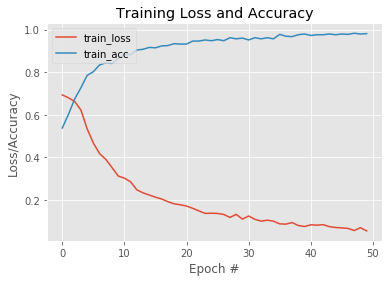

In [13]:
plt.style.use("ggplot")
plt.figure()
N = 50
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
# Save the model
cnn.save("pollen_carrying_bee_cnn.h5")

In [15]:
# Evaluate the model using the test data 
model_loss, model_accuracy = cnn.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.14504403709531663, Accuracy: 0.9370629370629371


#### Making Predictions

In [104]:
new_path = os.path.join("..", 'PollenDataset', 'images', "P7789-101r.jpg")
new_image = image.load_img(new_path, target_size= (32, 32))
new_img = image.img_to_array(new_image)
new_img = new_img.reshape((1,) + new_img.shape) 
new_img.shape

(1, 32, 32, 3)

In [105]:
proba = cnn.predict(new_img)
pollen_or_not = np.argmax(proba)
proba

array([[0., 1.]], dtype=float32)

In [106]:
pollen_or_not 

1

In [101]:
ynew = cnn.predict_proba(new_img)
np.argmax(ynew)

0